In [1]:
# Panutad Sirikul
# 650510714

### 1. Download the Thyroid Disease dataset (source: https://www.kaggle.com/datasets/yasserhessein/thyroid-disease-data-set) from https://www2.cs.science.cmu.ac.th/courses/204371/

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install feature_engine

In [4]:
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import CategoricalImputer
from feature_engine.imputation import AddMissingIndicator

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('/content/drive/MyDrive/Feature Engineering/hypothyroid.csv')

### 2. Write a python program to
 1. Impute missing data in the dataset
 2. Detect and treatment outliers

In [7]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,P
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,P
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,P
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,P
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,P


In [8]:
data.dtypes # ดูชนิดของข้อมูล

age                          float64
sex                           object
on thyroxine                  object
query on thyroxine            object
on antithyroid medication     object
sick                          object
pregnant                      object
thyroid surgery               object
I131 treatment                object
query hypothyroid             object
query hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH measured                  object
TSH                          float64
T3 measured                   object
T3                           float64
TT4 measured                  object
TT4                          float64
T4U measured                  object
T4U                          float64
FTI measured                  object
FTI                          float64
TBG measured                  object
T

In [9]:
data.shape # (จำนวนแถว, จำนวนคอลัมน์)

(3772, 30)

In [10]:
data.isnull().mean() # ตรวจสอบ missing value ด้วยการใช้ค่าเฉลี่ย

age                          0.000265
sex                          0.039767
on thyroxine                 0.000000
query on thyroxine           0.000000
on antithyroid medication    0.000000
sick                         0.000000
pregnant                     0.000000
thyroid surgery              0.000000
I131 treatment               0.000000
query hypothyroid            0.000000
query hyperthyroid           0.000000
lithium                      0.000000
goitre                       0.000000
tumor                        0.000000
hypopituitary                0.000000
psych                        0.000000
TSH measured                 0.000000
TSH                          0.097826
T3 measured                  0.000000
T3                           0.203871
TT4 measured                 0.000000
TT4                          0.061241
T4U measured                 0.000000
T4U                          0.102598
FTI measured                 0.000000
FTI                          0.102068
TBG measured

ตัวแปรที่มี missing value ได้แก่ age, sex, TSH, T3, TT4, T4U, FTI, TBG

In [11]:
data.describe() # ตัวแปรใดที่เป็นตัวเลข (float64)

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3771.000000,3403.000000,3003.000000,3541.000000,3385.000000,3387.000000,0.0
mean,51.735879,5.086766,2.013500,108.319345,0.995000,110.469649,NaN
std,20.084958,24.521470,0.827434,35.604248,0.195457,33.089698,NaN
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000,NaN
25%,36.000000,0.500000,1.600000,88.000000,0.880000,93.000000,NaN
50%,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000,NaN
75%,67.000000,2.700000,2.400000,124.000000,1.080000,124.000000,NaN
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000,NaN


In [12]:
data[["age", "sex", "TSH", "T3", "TT4", "T4U", "FTI", "TBG"]] # ดูว่าข้อมูลแต่ละตัวแปรที่มี missing value มีรูปแบบอย่างไร

,age,sex,TSH,T3,TT4,T4U,FTI,TBG
0,41.0,F,1.30,2.5,125.0,1.14,109.0,NaN
1,23.0,F,4.10,2.0,102.0,NaN,NaN,NaN
2,46.0,M,0.98,NaN,109.0,0.91,120.0,NaN
3,70.0,F,0.16,1.9,175.0,NaN,NaN,NaN
4,70.0,F,0.72,1.2,61.0,0.87,70.0,NaN
...,...,...,...,...,...,...,...,...
3767,30.0,F,NaN,NaN,NaN,NaN,NaN,NaN
3768,68.0,F,1.00,2.1,124.0,1.08,114.0,NaN
3769,74.0,F,5.10,1.8,112.0,1.07,105.0,NaN
3770,72.0,M,0.70,2.0,82.0,0.94,87.0,NaN


In [16]:
data["sex"].unique() # ดูว่า sex เป็นคำว่าอะไรได้บ้าง

array(['F', 'M', nan], dtype=object)

#### วิธีจัดการกับ missing value ในชุดข้อมูลนี้

ใช้ Median -> age, TT4, FTI

ใช้ Mean -> TSH, T3, T4U

ใช้ Mode -> sex

แปลงค่าให้เป็น 0 -> TBG

In [17]:
# สร้าง Model เพื่อจดจำตำแหน่งของ missing value
imputer = AddMissingIndicator(variables=['age', 'sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG'])

In [18]:
imputer.fit(data)

AddMissingIndicator(variables=['age', 'sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI',
                               'TBG'])

In [19]:
data.head() # ก่อน transform

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,P
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,P
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,P
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,P
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,P


In [20]:
data = imputer.transform(data) # นำ Model มา apply กับข้อมูล

In [21]:
data.head() # หลังจาก transform พบว่ามีคอลัมน์ที่ระบุว่าตัวแปรนั้นว่าเคยเป็น missing value มา 8 คอลัมน์

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,referral source,binaryClass,age_na,sex_na,TSH_na,T3_na,TT4_na,T4U_na,FTI_na,TBG_na
0,41.0,F,f,f,f,f,f,f,f,f,...,SVHC,P,0,0,0,0,0,0,0,1
1,23.0,F,f,f,f,f,f,f,f,f,...,other,P,0,0,0,0,0,1,1,1
2,46.0,M,f,f,f,f,f,f,f,f,...,other,P,0,0,0,1,0,0,0,1
3,70.0,F,t,f,f,f,f,f,f,f,...,other,P,0,0,0,0,0,1,1,1
4,70.0,F,f,f,f,f,f,f,f,f,...,SVI,P,0,0,0,0,0,0,0,1


In [22]:
# เติมค่าที่สูญหายไปด้วย Median
for var in ['age', 'TT4', 'FTI']:
    value = data[var].median()
    data[var] = data[var].fillna(value)

In [23]:
# เติมค่าที่สูญหายไปด้วย Mean
for var in ['TSH', 'T3', 'T4U']:
    value = data[var].mean()
    data[var] = data[var].fillna(value)

In [24]:
# ตัวแปร sex เป็น Categorical Data จึงใช้ฐานนิยม (Mode) แทนค่าที่สูญหาย
mode_imputer = CategoricalImputer(imputation_method='frequent', variables=['sex'])

In [25]:
mode_imputer.fit(data)

CategoricalImputer(imputation_method='frequent', variables=['sex'])

In [26]:
data = mode_imputer.transform(data)

In [27]:
# ตรวจสอบ TBG แล้วพบว่าตัวแปร TBG จะเป็น missing value ก็ต่อเมื่อ TBG measured มีค่าเป็น f
data[["TBG measured", "TBG"]][data['TBG measured'] == 'f']

,TBG measured,TBG
0,f,NaN
1,f,NaN
2,f,NaN
3,f,NaN
4,f,NaN
...,...,...
3767,f,NaN
3768,f,NaN
3769,f,NaN
3770,f,NaN


In [29]:
# เติมค่าที่สูญหายใน TBG ด้วย Arbitrary Number เป็น 0
from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.imputation import CategoricalImputer
from feature_engine.imputation import RandomSampleImputer

imputer = ArbitraryNumberImputer(arbitrary_number=0, variables=['TBG'])

In [30]:
imputer.fit(data)

ArbitraryNumberImputer(arbitrary_number=0, variables=['TBG'])

In [31]:
data = imputer.transform(data)

In [32]:
data.isnull().mean() # ตรวจสอบว่ายังมี missing value อยู่หรือไม่

age                          0.0
sex                          0.0
on thyroxine                 0.0
query on thyroxine           0.0
on antithyroid medication    0.0
sick                         0.0
pregnant                     0.0
thyroid surgery              0.0
I131 treatment               0.0
query hypothyroid            0.0
query hyperthyroid           0.0
lithium                      0.0
goitre                       0.0
tumor                        0.0
hypopituitary                0.0
psych                        0.0
TSH measured                 0.0
TSH                          0.0
T3 measured                  0.0
T3                           0.0
TT4 measured                 0.0
TT4                          0.0
T4U measured                 0.0
T4U                          0.0
FTI measured                 0.0
FTI                          0.0
TBG measured                 0.0
TBG                          0.0
referral source              0.0
binaryClass                  0.0
age_na    

In [33]:
data.loc[:, 'age':'binaryClass'].head() # ดูข้อมูลภาพรวมที่ไม่มี missing value แล้ว

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.140,t,109.0,f,0.0,SVHC,P
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,0.995,f,107.0,f,0.0,other,P
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.910,t,120.0,f,0.0,other,P
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,0.995,f,107.0,f,0.0,other,P
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.870,t,70.0,f,0.0,SVI,P


#### ตรวจจับและจัดการค่าผิดปกติ (Outliers) ในชุดข้อมูลนี้

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

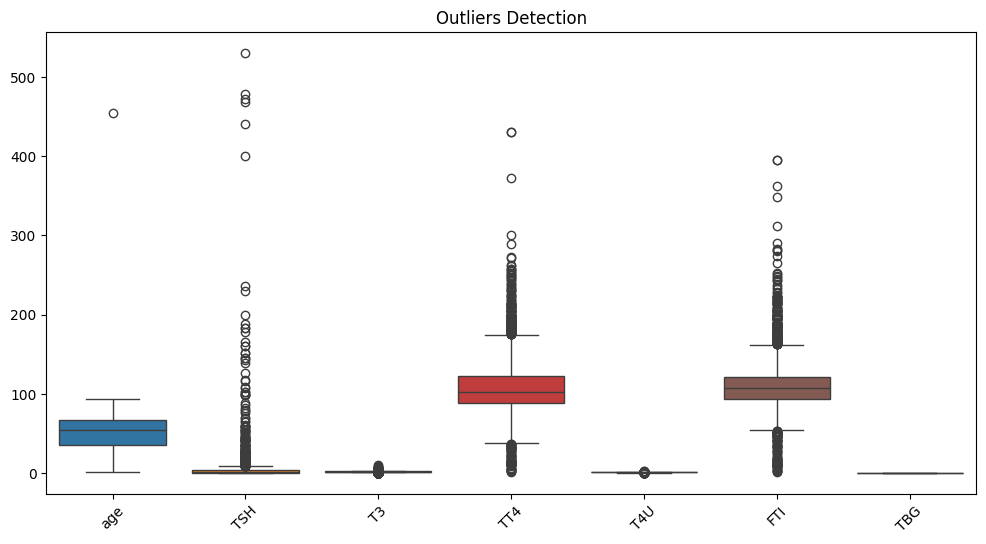

In [42]:
import matplotlib.pyplot as plt

numerical_data = ["age", "TSH", "T3", "TT4", "T4U", "FTI", "TBG"]

# ใช้ Box Plot ในการหา Outliers คร่าวๆ
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_data])
plt.title('Outliers Detection')
plt.xticks(rotation=45)
plt.show()

ตรวจสอบแล้ว พบว่าตัวแปรที่น่าจะมี Outliers ได้แก่ age, TSH, TT4, FTI

In [46]:
# ฟังก์ชันสำหรับการหาขอบเขตของ Outliers
def find_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary

In [60]:
# ตัวแปรไหนที่มีค่าในตัวแปรนั้น มีค่าเกิน Upper boundary หรือน้อยกว่า Lower boundary จะเป็น Outlier
age_upper_limit, age_lower_limit = find_boundaries(data, "age", 1.5)
print("Age Outliers boundary",
      "\nUpper boundary =", age_upper_limit,
      "\nLower boundary =", age_lower_limit )

TSH_upper_limit, TSH_lower_limit = find_boundaries(data, "TSH", 1.5)
print("\nTSH Outliers boundary",
      "\nUpper boundary =", TSH_upper_limit,
      "\nLower boundary =", TSH_lower_limit )

TT4_upper_limit, TT4_lower_limit = find_boundaries(data, "TT4", 1.5)
print("\nTT4 Outliers boundary",
      "\nUpper boundary =", TT4_upper_limit,
      "\nLower boundary =", TT4_lower_limit )

FTI_upper_limit, FTI_lower_limit = find_boundaries(data, "FTI", 1.5)
print("\nFTI Outliers boundary",
      "\nUpper boundary =", FTI_upper_limit,
      "\nLower boundary =", FTI_lower_limit )

Age Outliers boundary 
Upper boundary = 113.5 
Lower boundary = -10.5

TSH Outliers boundary 
Upper boundary = 8.6 
Lower boundary = -4.2

TT4 Outliers boundary 
Upper boundary = 174.0 
Lower boundary = 38.0

FTI Outliers boundary 
Upper boundary = 162.125 
Lower boundary = 53.125


In [94]:
outliers_age = np.where(data["age"] > age_upper_limit, True, np.where(data["age"] < age_lower_limit,
True, False))
outliers_TSH = np.where(data["TSH"] > TSH_upper_limit, True, np.where(data["TSH"] < TSH_lower_limit,
True, False))
outliers_TT4 = np.where(data["TT4"] > TT4_upper_limit, True, np.where(data["TT4"] < TT4_lower_limit,
True, False))
outliers_FTI = np.where(data["FTI"] > FTI_upper_limit, True, np.where(data["FTI"] < FTI_lower_limit,
True, False))

In [105]:
# ทำการตัด Outliers ออกไปจาก Data
data_trimmed = data.loc[~(outliers_age | outliers_TSH | outliers_TT4 | outliers_FTI)]

In [106]:
data_trimmed # ได้ Data ที่ไม่มี Outliers อยู่ภายในแล้ว

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,referral source,binaryClass,age_na,sex_na,TSH_na,T3_na,TT4_na,T4U_na,FTI_na,TBG_na
0,41.0,F,f,f,f,f,f,f,f,f,...,SVHC,P,0,0,0,0,0,0,0,1
1,23.0,F,f,f,f,f,f,f,f,f,...,other,P,0,0,0,0,0,1,1,1
2,46.0,M,f,f,f,f,f,f,f,f,...,other,P,0,0,0,1,0,0,0,1
4,70.0,F,f,f,f,f,f,f,f,f,...,SVI,P,0,0,0,0,0,0,0,1
6,59.0,F,f,f,f,f,f,f,f,f,...,other,P,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,F,f,f,f,f,f,f,f,f,...,other,P,0,0,1,1,1,1,1,1
3768,68.0,F,f,f,f,f,f,f,f,f,...,SVI,P,0,0,0,0,0,0,0,1
3769,74.0,F,f,f,f,f,f,f,f,f,...,other,P,0,0,0,0,0,0,0,1
3770,72.0,M,f,f,f,f,f,f,f,f,...,SVI,P,0,0,0,0,0,0,0,1


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

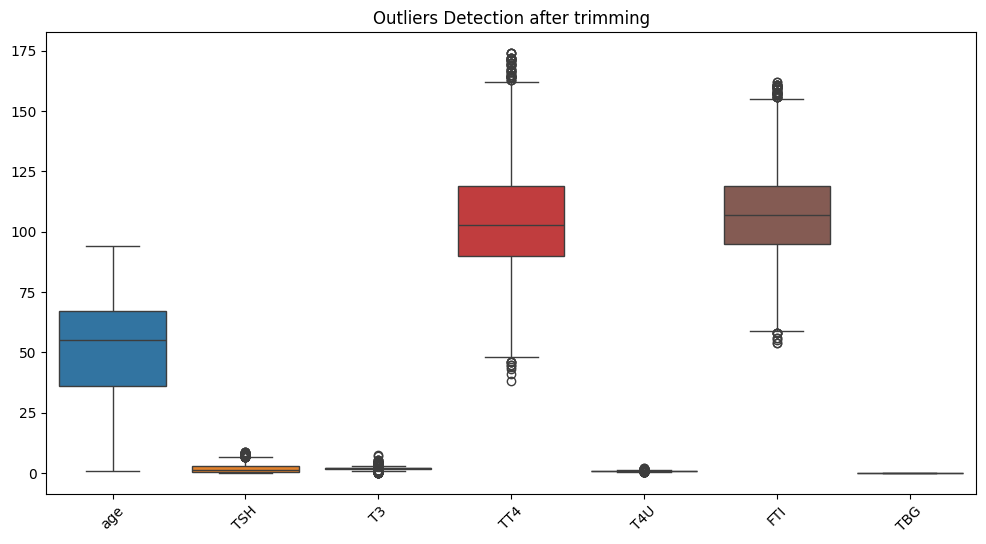

In [108]:
# ลองใช้ Box Plot ดูอีกรอบว่ายังมี Outliers อยู่หรือไม่
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_trimmed[numerical_data])
plt.title('Outliers Detection after trimming')
plt.xticks(rotation=45)
plt.show()

### 3. Submit your program to assignment submission system (http://hw.cs.science.cmu.ac.th/)